# Homework 3 Part 2 Task 2 - Regression
The data is in 'housing.csv'. <br>
Each row in the table is a data point:  the features of an area in California <br>
Clearly, the `median_house_value` is correlated with some other features, e.g., `median_income` and location <br>
Thus, we can estimate `median_house_value` = regression_model(`median_income`, `longitude`, `latitude`, ...) <br>
The taks is to build regressors to predict `median_house_value` using the other features <br>
If you need some motivation to do this task, see this <br>
A similar dataset on https://www.kaggle.com/c/zillow-prize-1 ($1,200,000)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.shape

(20640, 10)

### Data pre-processing: remove NaN

In [4]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [5]:
# there are 207 NaN in the column 'total_bedrooms', remove them
# check housing again using housing.isnull().sum()
housing['total_bedrooms'].fillna((housing['total_bedrooms'].mean()), inplace=True)
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Data pre-processing: Convert categorical data to numerical data - "ocean_proximity"

In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
#We can use one-hot encoding method by calling pd.get_dummies
categorical_columns=['ocean_proximity'] # must be a list
housing = pd.get_dummies(housing, columns=categorical_columns)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


### Visualize the data

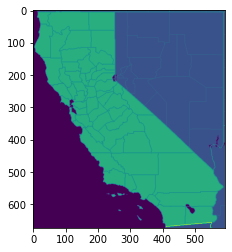

In [28]:
from PIL import Image
import numpy as np

california_img = Image.open('california.png')
california_img = np.array(california_img)
x1 = min(housing["longitude"].values)
x2 = max(housing["longitude"].values)

import matplotlib.pyplot as plt

plt.imshow(california_img)
plt.show()


### Prepare the Training and Testing Datasets

In [13]:
X=housing.drop(['median_house_value'], axis=1)
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0


In [14]:
Y=housing['median_house_value']
Y.head()

0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64

In [15]:
# convert pandas dataframe/series to numpy array
# sklearn functions may not work well with pandas data types
X_columns=X.columns #store the column names
X=X.values
Y=Y.values

In [16]:
#trainnig, validation, testing split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
#split X_train and Y_train into a 'pure' training set and a validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=0)
print('train:', X_train.shape, Y_train.shape)
print('validation:', X_val.shape, Y_val.shape)
print('test:', X_test.shape, Y_test.shape)

train: (14860, 13) (14860,)
validation: (1652, 13) (1652,)
test: (4128, 13) (4128,)


In [17]:
#apply feature normalization to training, validation and test sets
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(X_train) # think about why fit to X_train, not X ?
X_train=scaler.transform(X_train)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)

In [29]:
type(X_train)

numpy.ndarray

## Your task begins here:
(1) build a linear regression model to predict Y given X <br>
(2) build a KNN regression model to predict Y given X  <br>
(3) build a random-forest regression model to predict Y given X  <br>

### 1. LinearRegression from sklearn.linear_model

In [30]:
# step1: create a linear model, we assume the name of the model is linear_model
# step2: train/fit the model on the training set
# step3: do prediction on training and testing sets
#        Y_train_pred = linear_model.predict(X_train)
#        Y_test_pred = linear_model.predict(X_test)
# step4: compute MSE, MAE and MAPE of Y_train_pred and Y_test_pred, and print the values
# step5: compute R2 using the method linear_model.score(...) on the training set and the testing set
# step6: plot Y_train vs Y_train_pred, plot Y_test vs Y_test_pred
# step7: visualize the result on the California map
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [31]:
#step1:
linear_model = LinearRegression()


In [32]:
#step2:
linear_model.fit(X_train, Y_train)


LinearRegression()

In [33]:
#step3:
Y_train_pred = linear_model.predict(X_train)
Y_test_pred = linear_model.predict(X_test)

In [34]:
type(Y_test_pred)

numpy.ndarray

In [35]:
#step4:
print('Evaluate model on traning set')
MSE = np.mean((Y_train - Y_train_pred)**2)
MAE = np.mean(np.abs(Y_train - Y_train_pred))
MAPE =  np.mean(np.abs(Y_train - Y_train_pred)/Y_train)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)
print('Evaluate model on testing set')
MSE = np.mean((Y_test - Y_test_pred)**2)
MAE = np.mean(np.abs(Y_test - Y_test_pred))
MAPE =  np.mean(np.abs(Y_test - Y_test_pred)/Y_test)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)

Evaluate model on traning set
MSE= 4675883082.884457
MAE= 49675.60703126144
MAPE= 0.2870038556012951
Evaluate model on testing set
MSE= 4715994821.142622
MAE= 49655.95240199434
MAPE= 0.2895136136935612


In [36]:
#step5:
r2_train = linear_model.score(X_train, Y_train)
r2_test = linear_model.score(X_test, Y_test)
print('Training R2:', r2_train)
print('Testing R2:', r2_test)

Training R2: 0.6506129676781593
Testing R2: 0.6383314474472391


Text(0, 0.5, 'Y_train_pred')

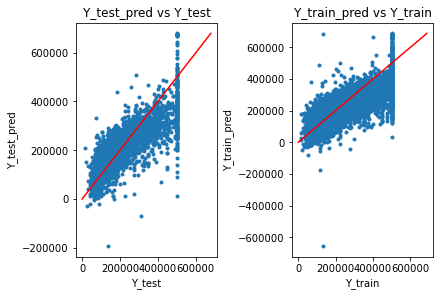

In [37]:
#step6: 
# the red line is the 45-degree line
fig, ax = plt.subplots(1,2,constrained_layout=True)
ax[0].set_title('Y_test_pred vs Y_test')
ax[0].plot(Y_test, Y_test_pred, '.')
ymax=np.max([Y_test.max(), Y_test_pred.max()])
ax[0].plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
ax[0].set_xlabel('Y_test')
ax[0].set_ylabel('Y_test_pred')
ax[1].set_title('Y_train_pred vs Y_train')
ax[1].plot(Y_train, Y_train_pred, '.')
ymax=np.max([Y_train.max(), Y_train_pred.max()])
ax[1].plot(np.linspace(0,ymax, 3), np.linspace(0, ymax, 3), '-r')
ax[1].set_xlabel('Y_train')
ax[1].set_ylabel('Y_train_pred')

Text(0.5, 1.0, 'prediction')

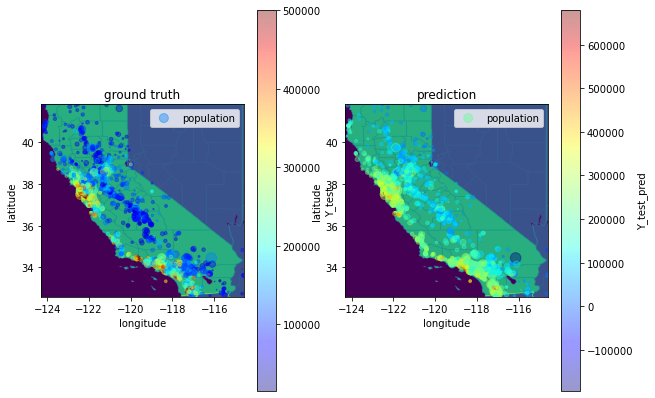

In [38]:
#step7:
data=scaler.inverse_transform(X_test)
data=pd.DataFrame(data, columns=X_columns)
data['Y_test']=Y_test
data['Y_test_pred']=Y_test_pred

x1 = min(data["longitude"].values)
x2 = max(data["longitude"].values)
y1 = min(data["latitude"].values)
y2 = max(data["latitude"].values)

fig, ax =plt.subplots(1,2)
data.plot(ax=ax[0], kind="scatter", x="longitude", y="latitude",
          s=data['population']/100, label="population",
          c="Y_test", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, figsize=(10,7))
ax[0].imshow(california_img,extent=[x1,x2,y1,y2])
ax[0].set_title('ground truth')
data.plot(ax=ax[1], kind="scatter", x="longitude", y="latitude",
          s=data['population']/100, label="population",
          c="Y_test_pred", cmap=plt.get_cmap("jet"),
          colorbar=True, alpha=0.4, figsize=(10,7))
ax[1].imshow(california_img,extent=[x1,x2,y1,y2])
ax[1].set_title('prediction')

In [39]:
Y_test.shape

(4128,)

### 2. KNeighborsRegressor from sklearn.neighbors.KNeighborsRegressor

In [40]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
# step1: create a knn regression model, we assume the name of the model is knn, set n_neighbors=5
# step2: train the model on the training set
# step3: do prediction on training and testing sets
#        Y_train_pred = knn.predict(X_train)
#        Y_test_pred = knn.predict(X_test)
# step4: compute MSE, MAE and MAPE of Y_train_pred and Y_test_pred, and print the values
# step5: compute R2 using the method knn.score(...) on the training set and the testing set
# step6: scatter plot Y_train vs Y_train_pred, scatter plot Y_test vs Y_test_pred
# step7: visualze the result on the map
# write each step in a cell

from sklearn.neighbors import KNeighborsRegressor


In [41]:
#step1:
knn_model = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


In [42]:
#step2:
knn_model.fit(X_train, Y_train)


KNeighborsRegressor()

In [43]:
#step3:
Y_train_pred_knn = knn_model.predict(X_train)
Y_test_pred_knn = knn_model.predict(X_test)

In [44]:
#step4:
mse_train_knn = mean_squared_error(Y_train, Y_train_pred_knn)
mae_train_knn = mean_absolute_error(Y_train, Y_train_pred_knn)
mape_train_knn = np.mean(np.abs(Y_train - Y_train_pred_knn) / Y_train)
print('KNN Training: \nMSE={}, \nMAE={}, \nMAPE={}'.format(mse_train_knn, mae_train_knn, mape_train_knn))

mse_test_knn = mean_squared_error(Y_test, Y_test_pred_knn)
mae_test_knn = mean_absolute_error(Y_test, Y_test_pred_knn)
mape_test_knn = np.mean(np.abs(Y_test - Y_test_pred_knn) / Y_test)
print('\nKNN Testing: \nMSE={}, \nMAE={}, \nMAPE={}'.format(mse_test_knn, mae_test_knn, mape_test_knn))


KNN Training: 
MSE=2536673978.865168, 
MAE=33662.21060565276, 
MAPE=0.18121674624371772

KNN Testing: 
MSE=3995148983.11626, 
MAE=42816.31531007752, 
MAPE=0.23257627257406085


In [45]:
#step5:
r2_train_knn = knn_model.score(X_train, Y_train)
r2_test_knn = knn_model.score(X_test, Y_test)
print('KNN Training R2:', r2_train_knn)
print('KNN Testing R2:', r2_test_knn)

KNN Training R2: 0.8104569815511709
KNN Testing R2: 0.6936129481146869


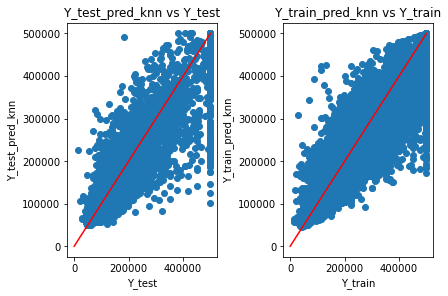

In [46]:
#step6: 
# Create scatter plots for the predicted values vs actual values
fig, ax = plt.subplots(1, 2, constrained_layout=True)

# Y_test vs Y_test_pred
ax[0].set_title('Y_test_pred_knn vs Y_test')
ax[0].scatter(Y_test, Y_test_pred_knn)
ymax = np.max([Y_test.max(), Y_test_pred_knn.max()])
ax[0].plot(np.linspace(0, ymax, 3), np.linspace(0, ymax, 3), '-r')
ax[0].set_xlabel('Y_test')
ax[0].set_ylabel('Y_test_pred_knn')

# Y_train vs Y_train_pred
ax[1].set_title('Y_train_pred_knn vs Y_train')
ax[1].scatter(Y_train, Y_train_pred_knn)
ymax = np.max([Y_train.max(), Y_train_pred_knn.max()])
ax[1].plot(np.linspace(0, ymax, 3), np.linspace(0, ymax, 3), '-r')
ax[1].set_xlabel('Y_train')
ax[1].set_ylabel('Y_train_pred_knn')

plt.show()




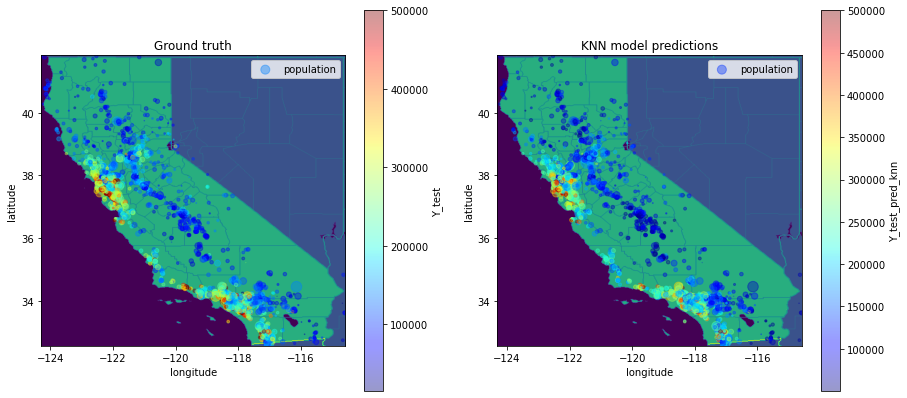

In [47]:
#step7:
import pandas as pd

# Inverse-transform the test set features back to their original values
X_test_original = scaler.inverse_transform(X_test)
X_test_original = pd.DataFrame(X_test_original, columns=X_columns)

# Create a new DataFrame with the original test set features and the actual and predicted target values
X_test_original['Y_test'] = Y_test
X_test_original['Y_test_pred_knn'] = Y_test_pred_knn

# Generate scatter plots on the map with color-coded actual and predicted target values
fig, ax = plt.subplots(1, 2, figsize=(15, 7))

x1 = min(X_test_original["longitude"].values)
x2 = max(X_test_original["longitude"].values)
y1 = min(X_test_original["latitude"].values)
y2 = max(X_test_original["latitude"].values)

# Ground truth
X_test_original.plot(ax=ax[0], kind="scatter", x="longitude", y="latitude",
                     s=X_test_original['population'] / 100, label="population",
                     c="Y_test", cmap=plt.get_cmap("jet"),
                     colorbar=True, alpha=0.4)
ax[0].imshow(california_img, extent=[x1, x2, y1, y2])
ax[0].set_title('Ground truth')

# KNN model predictions
X_test_original.plot(ax=ax[1], kind="scatter", x="longitude", y="latitude",
                     s=X_test_original['population'] / 100, label="population",
                     c="Y_test_pred_knn", cmap=plt.get_cmap("jet"),
                     colorbar=True, alpha=0.4)
ax[1].imshow(california_img, extent=[x1, x2, y1, y2])
ax[1].set_title('KNN model predictions')

plt.show()


### 3(a). RandomForestRegressor from sklearn.ensemble

In [48]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
# step1: create a RF regression model, we assume the name of the model is RF
#        set n_estimators=20, max_depth=10, and random_state=0
# step2: train the model on the training set
# step3: do prediction on training and testing sets
#        Y_train_pred = RF.predict(X_train)
#        Y_test_pred = RF.predict(X_test)
# step4: compute MSE, MAE and MAPE of Y_train_pred and Y_test_pred, and print the values
# step5: compute R2 using the method RF.score(...) on the training set and the testing set
# step6: scatter plot Y_train vs Y_train_pred, scatter plot Y_test vs Y_test_pred
# step7: visualze the result on the map
# write each step in a cell

In [49]:
#step1:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(n_estimators=20, max_depth=10, random_state=0)


In [50]:
#step2:
RF.fit(X_train, Y_train)


RandomForestRegressor(max_depth=10, n_estimators=20, random_state=0)

In [51]:
#step3:
Y_train_pred_rf = RF.predict(X_train)
Y_test_pred_rf = RF.predict(X_test)


In [52]:
#step4:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('Evaluate RF model on training set')
MSE = mean_squared_error(Y_train, Y_train_pred_rf)
MAE = mean_absolute_error(Y_train, Y_train_pred_rf)
MAPE = np.mean(np.abs(Y_train - Y_train_pred_rf) / Y_train)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)

print('Evaluate RF model on testing set')
MSE = mean_squared_error(Y_test, Y_test_pred_rf)
MAE = mean_absolute_error(Y_test, Y_test_pred_rf)
MAPE = np.mean(np.abs(Y_test - Y_test_pred_rf) / Y_test)
print('MSE=', MSE)
print('MAE=', MAE)
print('MAPE=', MAPE)


Evaluate RF model on training set
MSE= 1945491639.701538
MAE= 30476.40665806301
MAPE= 0.17315781021344928
Evaluate RF model on testing set
MSE= 2942752580.893462
MAE= 36889.27001864772
MAPE= 0.20957638311965976


In [53]:
#step5:
R2_train = RF.score(X_train, Y_train)
R2_test = RF.score(X_test, Y_test)
print('R2 on training set', R2_train)
print('R2 on testing set', R2_test)


R2 on training set 0.8546307642100066
R2 on testing set 0.7743209848998999


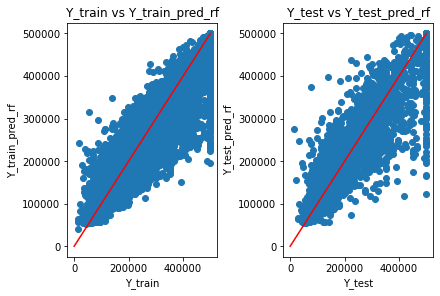

In [54]:
#step6:
fig, ax = plt.subplots(1, 2, constrained_layout=True)

ax[0].set_title('Y_train vs Y_train_pred_rf')
ax[0].scatter(Y_train, Y_train_pred_rf)
ax[0].plot([0, ymax], [0, ymax], '-r')
ax[0].set_xlabel('Y_train')
ax[0].set_ylabel('Y_train_pred_rf')

ax[1].set_title('Y_test vs Y_test_pred_rf')
ax[1].scatter(Y_test, Y_test_pred_rf)
ax[1].plot([0, ymax], [0, ymax], '-r')
ax[1].set_xlabel('Y_test')
ax[1].set_ylabel('Y_test_pred_rf')

plt.show()


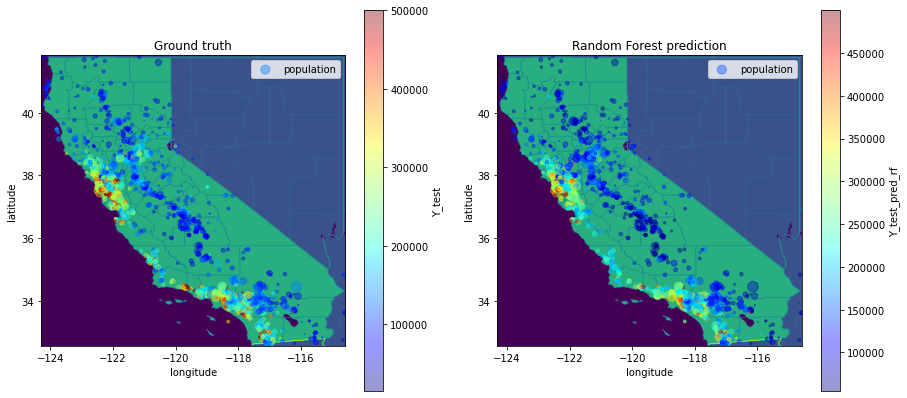

In [55]:
#step7:
X_test_original['Y_test_pred_rf'] = Y_test_pred_rf

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

# Ground truth
X_test_original.plot(ax=ax[0], kind="scatter", x="longitude", y="latitude",
                     s=X_test_original['population'] / 100, label="population",
                     c="Y_test", cmap=plt.get_cmap("jet"),
                     colorbar=True, alpha=0.4)
ax[0].imshow(california_img, extent=[x1, x2, y1, y2])
ax[0].set_title('Ground truth')

# Random Forest model predictions
X_test_original.plot(ax=ax[1], kind="scatter", x="longitude", y="latitude",
                     s=X_test_original['population'] / 100, label="population",
                     c="Y_test_pred_rf", cmap=plt.get_cmap("jet"),
                     colorbar=True, alpha=0.4)
ax[1].imshow(california_img, extent=[x1, x2, y1, y2])
ax[1].set_title('Random Forest prediction')

plt.show()


### 3(b). Find the best max_depth in RandomForestRegressor
In the previous sub-task, we set max_depth=10. <br>
In this section, we will use grid-search to find the best value of max_depth.

In [56]:
#create an array of possible max_depth
# you may need the function np.arange
# The minimum value of max_depth is 1, obviously.
# assume the name of the array is max_depth_list

max_depth_list = np.arange(1, 101,5)
max_depth_list

array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96])

In [57]:
#train a RandomForestRegressor with max_depth in max_depth_list
#inside a for loop: 
#   create a model with a max_depth in max_depth_list
#   set  n_estimators=20
#   set random_state=0 so that the result is reproducible
#   train the model on the training set
#   record the MAE on the training set (X_train, Y_train) into a list MAE_train_list
#   record the MAE on the validation set (X_val, Y_val) into a list MAE_val_list

from sklearn.metrics import mean_absolute_error

MAE_train_list = []
MAE_val_list = []

# Train RandomForestRegressor with max_depth values in max_depth_list
for max_depth in max_depth_list:
    # Create a model with max_depth, n_estimators=20, and random_state=0
    rf_model = RandomForestRegressor(max_depth=max_depth, n_estimators=20, random_state=0)

    # Train the model on the training set
    rf_model.fit(X_train, Y_train)

    # Predict on the training set and compute MAE
    Y_train_pred = rf_model.predict(X_train)
    MAE_train = mean_absolute_error(Y_train, Y_train_pred)
    MAE_train_list.append(MAE_train)

    # Predict on the validation set and compute MAE
    Y_val_pred = rf_model.predict(X_val)
    MAE_val = mean_absolute_error(Y_val, Y_val_pred)
    MAE_val_list.append(MAE_val)

# Print the MAE_train_list and MAE_val_list
print("MAE_train_list:", MAE_train_list)
print("MAE_val_list:", MAE_val_list)



MAE_train_list: [73350.39113411319, 43644.28894618743, 27431.75522589921, 16640.921780998717, 13249.055125209657, 12780.914690250522, 12762.299232383812, 12742.598328366339, 12744.596086810228, 12744.596086810228, 12744.596086810228, 12744.596086810228, 12744.596086810228, 12744.596086810228, 12744.596086810228, 12744.596086810228, 12744.596086810228, 12744.596086810228, 12744.596086810228, 12744.596086810228]
MAE_val_list: [73113.4835500284, 46499.88097796988, 36793.3698123538, 34216.02165901085, 33959.70593688395, 33931.63249003613, 33967.662812863084, 33860.93253631961, 33905.302421307504, 33905.302421307504, 33905.302421307504, 33905.302421307504, 33905.302421307504, 33905.302421307504, 33905.302421307504, 33905.302421307504, 33905.302421307504, 33905.302421307504, 33905.302421307504, 33905.302421307504]


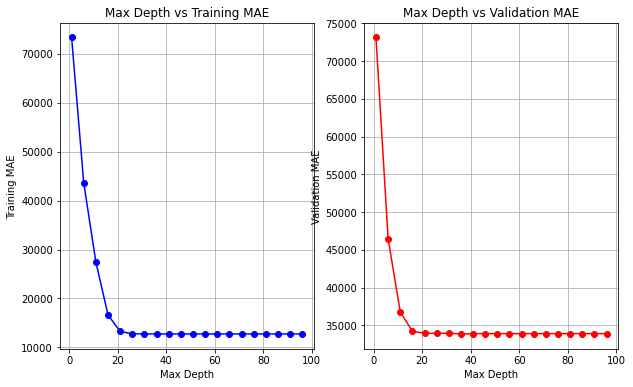

In [58]:
#plot max_depth vs MAE_train using max_depth_list and MAE_train_list
#plot max_depth vs MAE_val using max_depth_list and MAE_val_list
# Create the first figure for max_depth vs MAE_train

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# Plot max_depth vs MAE_train
ax[0].plot(max_depth_list, MAE_train_list, 'b', marker='o')
ax[0].set_xlabel('Max Depth')
ax[0].set_ylabel('Training MAE')
ax[0].set_title('Max Depth vs Training MAE')
ax[0].grid(True)

# Plot max_depth vs MAE_val
ax[1].plot(max_depth_list, MAE_val_list, 'r', marker='o')
ax[1].set_xlabel('Max Depth')
ax[1].set_ylabel('Validation MAE')
ax[1].set_title('Max Depth vs Validation MAE')
ax[1].grid(True)

plt.show()



Trainig MAE and validation MAE keep decreasing as max_depth increases. <br>
To determine the optimal max_depth, we may need to consider both validation accuracy and model complexity:  <br>
select a small max_depth with high validation accuracy <br>
We could use the elbow method: <br>
starting from the best max_depth, the validation accuracy becomes "almost" flat. <br>
Thus, the best max_depth could be around ???

In [59]:

threshold = 0.01
rate_of_change = np.diff(MAE_val_list) / MAE_val_list[:-1]

# Find the index where the rate of change is less than the threshold
elbow_index = np.where(np.abs(rate_of_change) < threshold)[0][0]

max_depth_best = max_depth_list[elbow_index]

max_depth_best

16

In [60]:
#now, we use the best max_depth to build a RandomForestRegressor
#train it on the training set and evaluate it on the testing set
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Create a RandomForestRegressor with the best max_depth
RF_best = RandomForestRegressor(n_estimators=20, max_depth=max_depth_best, random_state=0)

# Train the model on the training set
RF_best.fit(X_train, Y_train)

# Do prediction on the testing set
Y_test_pred = RF_best.predict(X_test)

MAPE on the test set is reduced by using max_depth=20

We can obtain feature importances stored in RF.feature_importances_

<BarContainer object of 13 artists>

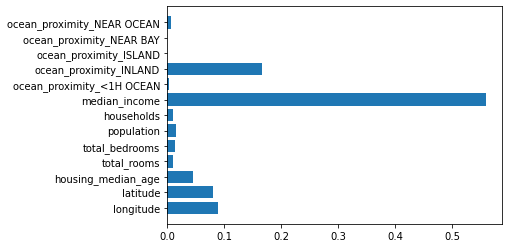

In [61]:
plt.barh(y=X_columns, width=RF.feature_importances_)

The most important two features are median_income and ocean_proximity_inland <br>
You may select the top-N important features and re-do the regression. <br>
The purpuse of feature selection is to remove those features irrelevant to the task <br>
Question to think about: <br>
The top-N important features are important only for RandomForestRegressor ? <br>
or they are important for the regression task (no matter what model you use)? <br>
(there is no definite answer)

### 4. XGBRegressor
use XGBRegressor from xgboost.sklearn <br>
https://xgboost.readthedocs.io/en/latest/python/python_api.html <br>
you may need to install the package or use google colab https://colab.research.google.com <br>
set n_estimators=20, random_state=0, objective='reg:squarederror' <br>
find the best value of max_depth using grid-search <br>
test the model on the testing set

In [79]:
!pip install xgboost

In [80]:
from xgboost.sklearn import XGBRegressor

In [81]:
#create an array of possible max_depth

import numpy as np

max_depth_list = np.arange(1, 31)  # The array will contain values from 1 to 20

max_depth_list

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [82]:

MAE_train_list=[]
MAE_val_list=[]
#grid search
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

MAE_train_list = []
MAE_val_list = []

for max_depth in max_depth_list:
    xgb_model = XGBRegressor(n_estimators=20, max_depth=max_depth, random_state=0, objective='reg:squarederror')
    xgb_model.fit(X_train, Y_train)

    Y_train_pred = xgb_model.predict(X_train)
    Y_val_pred = xgb_model.predict(X_val)

    mae_train = mean_absolute_error(Y_train, Y_train_pred)
    mae_val = mean_absolute_error(Y_val, Y_val_pred)

    MAE_train_list.append(mae_train)
    MAE_val_list.append(mae_val)

print("MAE_train_list:", MAE_train_list)
print("MAE_val_list:", MAE_val_list)


MAE_train_list: [52728.171870794074, 45787.85091399941, 40338.312144862466, 35984.882125620374, 32892.062750778096, 29780.33528584497, 25998.952789314855, 22894.503457399267, 19113.44550150362, 16036.208963871131, 12119.912758007024, 10540.086321816118, 7339.6599926133495, 5290.875773626766, 3950.4619928578186, 2807.3858633049085, 2110.460534388669, 1504.0008511077347, 1168.6136550513122, 1109.434819184787, 937.286816537685, 882.3816522570029, 858.0521342425135, 830.7102344538611, 803.5727612008959, 790.0086639363224, 766.3745964286466, 762.9393488312794, 759.5382305817842, 762.003168242135]
MAE_val_list: [54426.71628140133, 47139.860443780264, 42589.88216461108, 38928.89911376362, 37163.76505277694, 35800.19202103511, 33853.94910052209, 33607.61767932809, 33018.27828720869, 32954.5446002951, 32617.616527788286, 33383.13865532309, 33978.53570482748, 33273.65135063559, 33423.19574284957, 34355.94995412757, 34021.99738243417, 34413.764988933865, 34508.191403885445, 34492.894500510745, 34

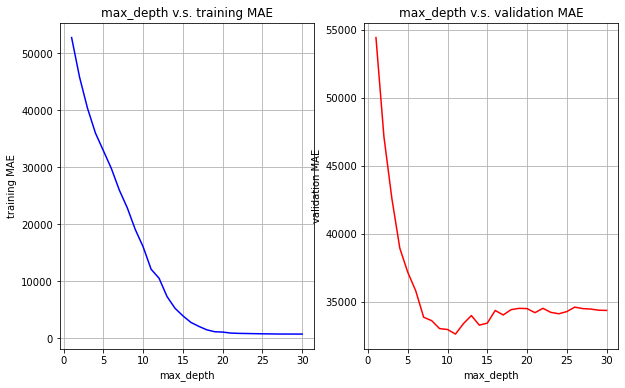

In [83]:
# plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 6))

ax[0].plot(max_depth_list, MAE_train_list, 'b')
ax[0].set_xlabel('max_depth')
ax[0].set_ylabel('training MAE')
ax[0].set_title('max_depth v.s. training MAE')
ax[0].grid(True)

ax[1].plot(max_depth_list, MAE_val_list, 'r')
ax[1].set_xlabel('max_depth')
ax[1].set_ylabel('validation MAE')
ax[1].set_title('max_depth v.s. validation MAE')
ax[1].grid(True)

plt.show()


In [84]:
#find max_depth_best using np.argmin, max_depth_list and MAE_val_list

max_depth_best

11

In [85]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from xgboost.sklearn import XGBRegressor

max_depth_list = np.arange(1, 21)  # The array will contain values from 1 to 20
MAE_train_list = []
MAE_val_list = []

for max_depth in max_depth_list:
    # Create an XGBRegressor with the current max_depth
    xgb_model = XGBRegressor(n_estimators=20, max_depth=max_depth, random_state=0, objective='reg:squarederror')

    # Train the model on the training set
    xgb_model.fit(X_train, Y_train)

    # Do prediction on the training and validation sets
    Y_train_pred = xgb_model.predict(X_train)
    Y_val_pred = xgb_model.predict(X_val)

    # Compute MAE on the training and validation sets
    MAE_train = mean_absolute_error(Y_train, Y_train_pred)
    MAE_val = mean_absolute_error(Y_val, Y_val_pred)

    # Record the MAE values
    MAE_train_list.append(MAE_train)
    MAE_val_list.append(MAE_val)

# Determine the optimal max_depth
max_depth_best = max_depth_list[np.argmin(MAE_val_list)]
print('Best max_depth:', max_depth_best)


Best max_depth: 11


In [86]:
#train and test a XGBRegressor using the best max_depth
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the XGBRegressor using the best max_depth value
xgb_best_model = XGBRegressor(n_estimators=20, max_depth=max_depth_best, random_state=0, objective='reg:squarederror')
xgb_best_model.fit(X_train, Y_train)

# Do prediction on the training and testing sets
Y_train_pred = xgb_best_model.predict(X_train)
Y_test_pred = xgb_best_model.predict(X_test)

# Compute evaluation metrics on the training and testing sets
MAE_train = mean_absolute_error(Y_train, Y_train_pred)
MSE_train = mean_squared_error(Y_train, Y_train_pred)
R2_train = r2_score(Y_train, Y_train_pred)

MAE_test = mean_absolute_error(Y_test, Y_test_pred)
MSE_test = mean_squared_error(Y_test, Y_test_pred)
R2_test = r2_score(Y_test, Y_test_pred)

# Print the results
print("Training set:")
print("MAE =", MAE_train)
print("MSE =", MSE_train)
print("R2 =", R2_train)
print("\nTesting set:")
print("MAE =", MAE_test)
print("MSE =", MSE_test)
print("R2 =", R2_test)


Training set:
MAE = 12119.912758007024
MSE = 311695561.7753502
R2 = 0.9767097710985967

Testing set:
MAE = 32029.049320191378
MSE = 2292813525.478662
R2 = 0.8241646608016531


It seems XGBRegressor is slightly better than RandomForestRegressor <br>
Keep in mind that, we only optimized one hyper-parameter: max_depth <br>
If you want to win a competition or complete a project to make a profit, you may need to perform grid search for all hyper-parameters.